In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#importing the data
df = pd.read_csv('data/raw/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
print(df.shape)

(768, 9)


In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [17]:
#GETTING COLUMN NAME/TYPE

def split_columns(data_frame : pd.DataFrame) -> tuple[list, list]:
    numeric_columns = data_frame.select_dtypes(include=[np.number]).columns.tolist()
    print("Numeric columns:", numeric_columns)
    categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
    print("Categorical columns:", categorical_columns)


    return numeric_columns, categorical_columns

numeric_variables, categorical_variables = split_columns(df)

Numeric columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Categorical columns: []


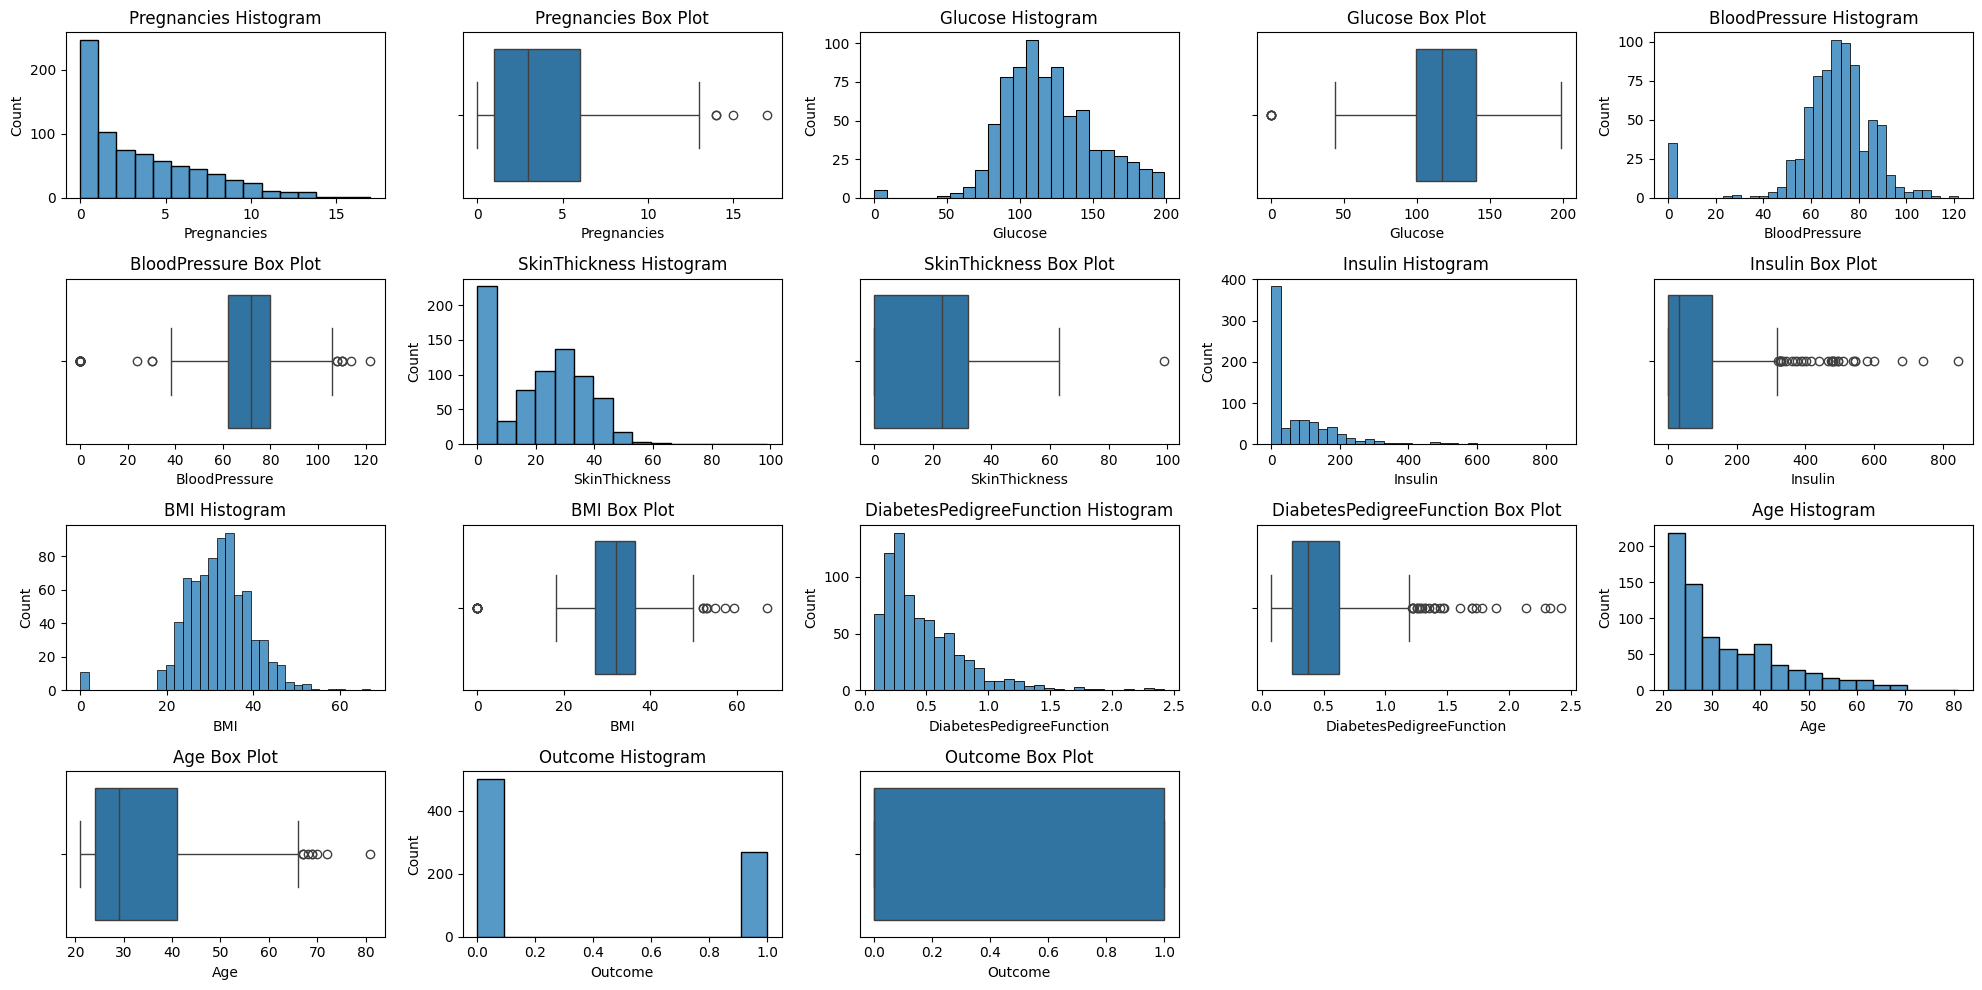

In [18]:
#NUMERIC VARIABLES


def plot_numeric_analysis(data_frame: pd.DataFrame, column_list: list[str], num_rows: int) -> None:
    num_vars = len(column_list)
    total_plots = 2 * num_vars  # Two plots (histogram and box plot) per variable
    columns_per_row = (total_plots + num_rows - 1) // num_rows  # Calculate how many plots to display in each row

    fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(20, 10))
    axes = axes.flatten()  # Flatten the axes array for easier indexing

    for i, column in enumerate(column_list):
        # Histogram
        sns.histplot(ax=axes[2*i], data=data_frame, x=column)
        axes[2*i].set_title(f'{column} Histogram')
        
        # Box plot
        sns.boxplot(ax=axes[2*i + 1], data=data_frame, x=column)
        axes[2*i + 1].set_title(f'{column} Box Plot')
    
    # Hide any unused subplots
    for j in range(2 * num_vars, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

plot_numeric_analysis(df, numeric_variables, 4)

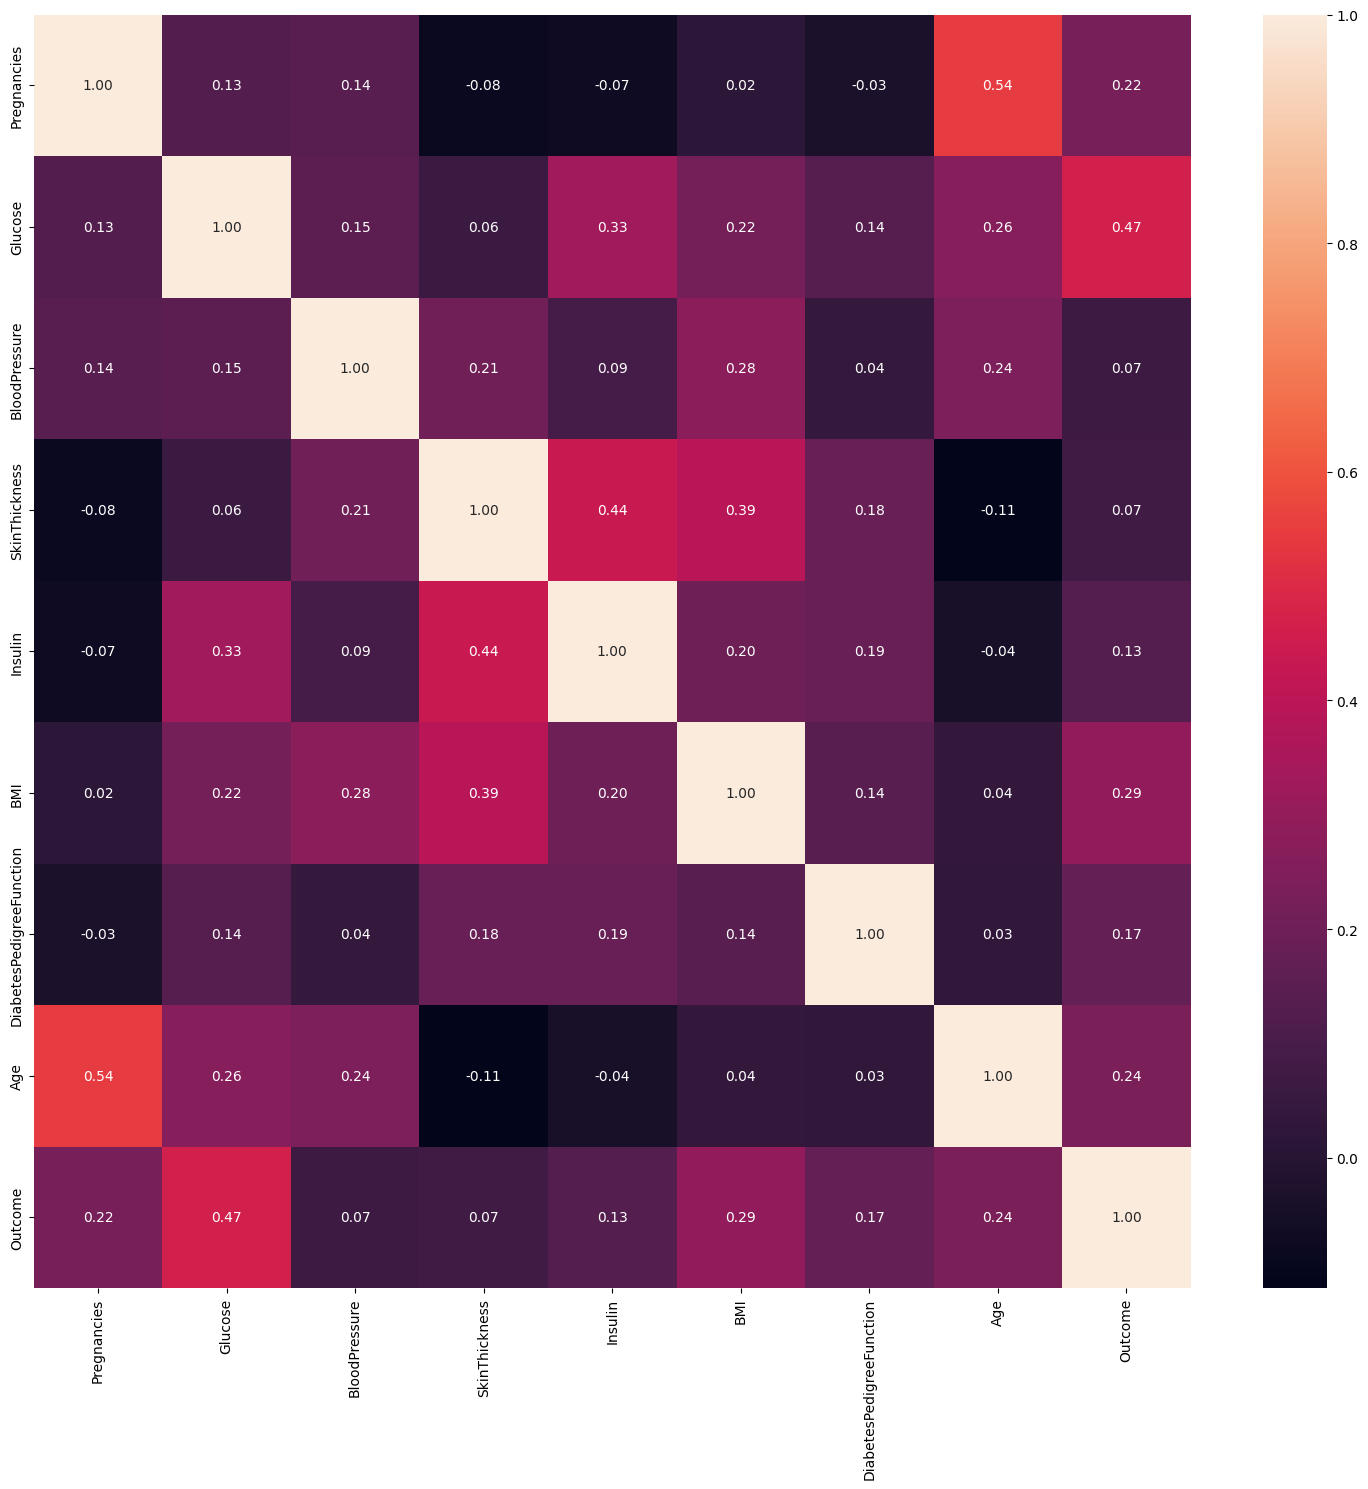

In [19]:
#HEATMAP

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(df[df.columns].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

In [20]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
#OUTLIER ANALYSIS


df = df[df['Glucose'] != 0]
df = df[df['BMI'] != 0]
print(df.shape)

(752, 9)


In [22]:
#Null Values
df.isnull().sum().sort_values(ascending = False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
#Splitting the data
from sklearn.model_selection import train_test_split

# We divide the dataset into training and test samples
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
#Feature selection

X_train_sel = X_train[["Age", "BMI", "Glucose", "Insulin", "DiabetesPedigreeFunction"]]
X_test_sel = X_test[["Age", "BMI", "Glucose", "Insulin", 'DiabetesPedigreeFunction']]

X_train_sel.head()

,Age,BMI,Glucose,Insulin,DiabetesPedigreeFunction
599,26,23.1,109,120,0.407
136,21,30.8,100,50,0.597
45,25,42.0,180,0,1.893
73,23,35.1,129,270,0.231
508,21,30.4,84,76,0.968


In [25]:
#Saving the data
X_train_sel["Outcome"] = list(y_train)
X_test_sel["Outcome"] = list(y_test)
X_train_sel.to_csv("data/clean/clean_train.csv", index = False)
X_test_sel.to_csv("data/clean/clean_test.csv", index = False)

/tmp/ipykernel_6606/75840784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_sel["Outcome"] = list(y_train)
/tmp/ipykernel_6606/75840784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_sel["Outcome"] = list(y_test)
